In [26]:
import os
import matplotlib.pyplot as plt
import numpy as np
import dill
from pyspi.calculator import Calculator


In [27]:
calc = Calculator(configfile='/home/dan/data/connectivity/pyspi_testing/mymeasures.yaml')

Loading configuration file: /home/dan/data/connectivity/pyspi_testing/mymeasures.yaml
*** Importing module .statistics.basic
[0] Adding SPI .statistics.basic.Covariance(x,y,{'estimator': 'EmpiricalCovariance'})
Succesfully initialised SPI with identifier "cov_EmpiricalCovariance" and labels ['basic', 'unordered', 'linear', 'undirected', 'signed']
[1] Adding SPI .statistics.basic.Covariance(x,y,{'estimator': 'GraphicalLasso'})
Succesfully initialised SPI with identifier "cov_GraphicalLasso" and labels ['basic', 'unordered', 'linear', 'undirected', 'signed']
[2] Adding SPI .statistics.basic.Covariance(x,y,{'estimator': 'GraphicalLassoCV'})
Succesfully initialised SPI with identifier "cov_GraphicalLassoCV" and labels ['basic', 'unordered', 'linear', 'undirected', 'signed']
[3] Adding SPI .statistics.basic.Covariance(x,y,{'estimator': 'LedoitWolf'})
Succesfully initialised SPI with identifier "cov_LedoitWolf" and labels ['basic', 'unordered', 'linear', 'undirected', 'signed']
[4] Adding SP

In [28]:
# # find all "calc.pkl" files recursively
# calc_files = []
# path = "/home/dan/data/connectivity/pyspi_testing/nonoverlappingepochs_data/"
# for root, dirs, files in os.walk(path):
#     for file in files:
#         if file.endswith("calc.pkl"):
#             calc_files.append(os.path.join(root, file))
# calc_files = sorted(calc_files)
# calc
# for file in calc_files:
#     with open(file, "rb") as f:
#         calc = dill.load(f)
#     break


In [29]:
import seaborn as sns


In [30]:
with open("/home/dan/data/connectivity/pyspi_testing/034_firstepoch_gpu-false", "rb") as f:
    calc = dill.load(f)

In [32]:
for idx in calc.table.columns.get_level_values(0).unique():
    # if exists, skip
    if os.path.exists(f"/home/dan/data/connectivity/pyspi_testing/calc_images/{idx}.png"):
        continue
    c = calc.table[idx]

    path = "/home/dan/data/connectivity/pyspi_testing/calc_images"
    os.makedirs(path, exist_ok=True)

    sns.heatmap(c.values, cmap='nipy_spectral', square=True)
    plt.title(f"{idx} | (min, max) = ({np.nanmin(c.values)}, {np.nanmax(c.values)})")
    plt.savefig(f"{path}/{idx}.png")
    plt.close()

In [ ]:
import itertools
cols = calc.table.columns.get_level_values(0).unique()
pairs = list(itertools.combinations(cols, 2))


diffs = []
for (x,y) in pairs:
    a = calc.table[x].values
    b = calc.table[y].values
    # if all values are nan, skip
    if np.all(np.isnan(a)) or np.all(np.isnan(b)):
        continue
    diff = np.nansum(np.abs(a - b))
    diffs.append((x, y, diff))


diffs = sorted(diffs, key=lambda x: x[2])
diffs = np.array(diffs)

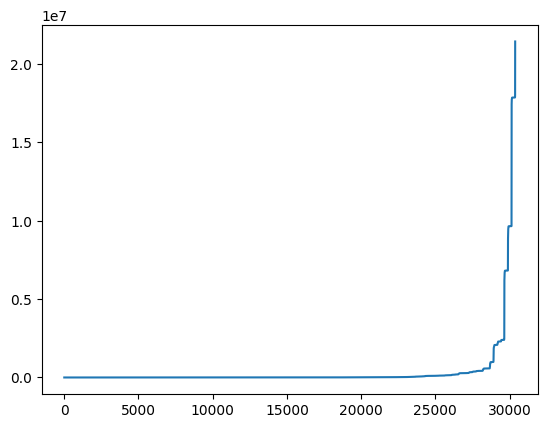

In [34]:
y = [x[2] for x in diffs]
x = np.arange(len(y))
plt.plot(x, y)

In [42]:
def clear_pairs(pairs, data):
    for (x, y, _) in pairs:
        a = np.char.find(diffs[:, :2], x) >= 0
        b = np.char.find(diffs[:, :2], y) >= 0
        mask = a & b
        data = data[~mask]


In [45]:
sames = [('dtf_multitaper_mean_fs','pdcoh_multitaper_mean_fs'),]

In [46]:
diffs[1]

array(['dtf_multitaper_mean_fs-1_fmin-0-000488_fmax-0-122',
       'pdcoh_multitaper_mean_fs-1_fmin-0-000488_fmax-0-122',
       '1.827523592526359e-13'], dtype='<U60')

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [37]:
diffs[1]

array(['dtf_multitaper_mean_fs-1_fmin-0-000488_fmax-0-122',
       'pdcoh_multitaper_mean_fs-1_fmin-0-000488_fmax-0-122',
       '1.827523592526359e-13'], dtype='<U60')

Review

ce_gaussian
ce_kernel_W-0.5
gd_multitaper_mean_
je_gaussian
je_kernel_W-0.5
je_kozachenko
gd_multitaper_mean_

some are nan but not all
psi_multitaper_mean_ 
sgc_parametric_mean_
xcorr_mean - looks like dependent on if sig or not

weird ones
dcoh_multitaper_mean_


intresting:
lmfit_ridge - has only vertical lines (something with sourcesink?)

psi wavelet vs multitaper does look significantly different